In [1]:
import pandas as pd
import numpy as np
from source import path
import joblib

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(path.file_modified)

In [3]:
df.head()

,productionvolume,productioncost,supplierquality,deliverydelay,defectrate,qualityscore,maintenancehours,downtimepercentage,inventoryturnover,stockoutrate,...,maintenancehourspermonth,prod_vol_permant_hour_perday,mant_hour_perprod_vol_perday,QScore_per_SupQuality,QScore_per_ProdCost,QScore_per_InvTurnOver,QScore_per_WorkerProd,QScore_per_EnergyEff,QScore_per_AddPrcssTime,QScore_per_AddMatCost
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,...,38.571429,157.111111,0.006365,0.732424,0.004817,7.353384,0.746257,135.332021,11.431488,0.268413
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,...,85.714286,187.250000,0.005340,0.969727,0.004234,9.003059,0.839855,700.490665,9.217056,0.236463
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,...,4.285714,6720.000000,0.000149,1.100059,0.004740,17.724532,0.973403,182.014690,13.767016,0.228049
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,...,34.285714,323.750000,0.003089,0.774351,0.011975,18.903284,0.698016,369.303250,8.351803,0.412029
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,...,38.571429,160.222222,0.006241,1.009006,0.011071,12.074116,0.936736,313.951247,12.913885,0.226214


In [49]:
df[model_vars].describe()

c:\Users\JUAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,productionvolume,productioncost,supplierquality,defectrate,qualityscore,maintenancehours,downtimepercentage,inventoryturnover,workerproductivity,energyconsumption,...,additivematerialcost,maintenancehoursperday,prod_vol_permant_hour_perday,mant_hour_perprod_vol_perday,QScore_per_SupQuality,QScore_per_InvTurnOver,QScore_per_ProdCost,QScore_per_WorkerProd,QScore_per_AddMatCost,QScore_per_EnergyEff
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,...,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.749116,80.134272,11.476543,2.501373,6.019662,90.040115,2988.494453,...,299.515479,1.639506,inf,0.004238,0.895952,16.091247,0.007453,0.893573,0.323824,324.112539
std,262.402073,4308.051904,5.759143,1.310154,11.611750,6.872684,1.443684,2.329791,5.723600,1153.420820,...,116.379905,0.981812,NaN,0.004347,0.143559,8.235175,0.003304,0.141438,0.165348,168.522417
min,100.000000,5000.174521,80.004820,0.500710,60.010098,0.000000,0.001665,2.001611,80.004960,1000.720156,...,100.211137,0.000000,32.136364,0.000000,0.603980,6.126735,0.003047,0.605076,0.123973,122.677049
25%,322.000000,8728.829280,84.869219,1.598033,70.103420,5.750000,1.264597,3.983249,85.180203,1988.140273,...,194.922058,0.821429,189.000000,0.001417,0.778875,9.929072,0.004937,0.779352,0.200100,200.001326
50%,549.000000,12405.204656,89.704861,2.708775,80.265312,12.000000,2.465151,6.022389,90.125743,2996.822301,...,299.728918,1.714286,337.252632,0.002965,0.894727,13.339502,0.006490,0.890407,0.269583,266.613053
75%,775.250000,16124.462428,94.789936,3.904533,90.353822,17.000000,3.774861,8.050222,95.050838,3984.788299,...,403.178283,2.428571,705.950000,0.005291,1.004013,20.066045,0.009112,0.998263,0.409304,405.614056
max,999.000000,19993.365549,99.989214,4.998529,99.996993,23.000000,4.997591,9.998577,99.996786,4997.074741,...,499.982782,3.285714,inf,0.031117,1.237579,48.900876,0.019042,1.242438,0.997353,974.375499


In [4]:
df.columns
model_vars = ['productionvolume', 'productioncost', 'supplierquality', 
       'defectrate', 'qualityscore', 'maintenancehours', 'downtimepercentage', 
       'inventoryturnover', 'workerproductivity', 'energyconsumption', 
       'energyefficiency', 'additiveprocesstime', 'additivematerialcost', 
       'maintenancehoursperday', 'prod_vol_permant_hour_perday', 
       'mant_hour_perprod_vol_perday', 'QScore_per_SupQuality', 
       'QScore_per_InvTurnOver', 'QScore_per_ProdCost', 'QScore_per_WorkerProd', 
       'QScore_per_AddMatCost', 'QScore_per_EnergyEff']

In [5]:
X = df[model_vars].values
y = df['defectstatus'].values

In [6]:
X.shape

(3240, 22)

In [7]:
y.shape

(3240,)

In [8]:
np.isinf(X).sum()

138

In [9]:
X = np.where(np.isinf(X), np.nan, X)

In [10]:
np.isnan(X).sum()

138

In [11]:
if isinstance(X, pd.DataFrame):
    X.fillna(X.mean(), inplace=True)
else:
    # Se X for um array numpy
    col_mean = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean, inds[1])

In [12]:
np.isnan(X).sum()

0

In [13]:
X.shape

(3240, 22)

In [14]:
X

array([[2.02000000e+02, 1.31754038e+04, 8.66485338e+01, ...,
        7.46257276e-01, 2.68413475e-01, 1.35332021e+02],
       [5.35000000e+02, 1.97700461e+04, 8.63106636e+01, ...,
        8.39855159e-01, 2.36462814e-01, 7.00490665e+02],
       [9.60000000e+02, 1.90608210e+04, 8.21324724e+01, ...,
        9.73402997e-01, 2.28048882e-01, 1.82014690e+02],
       ...,
       [8.35000000e+02, 1.17361777e+04, 9.64315538e+01, ...,
        9.55672331e-01, 3.77613630e-01, 2.39527921e+02],
       [3.02000000e+02, 1.36641962e+04, 9.10897823e+01, ...,
        1.08212438e+00, 4.69916145e-01, 4.29905749e+02],
       [3.55000000e+02, 1.35636058e+04, 8.35959563e+01, ...,
        1.10023153e+00, 2.91328393e-01, 4.59152677e+02]])

In [15]:
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [16]:
X_StdScaler = StandardScaler().fit_transform(X)
X_StdScaler

array([[-1.32078467,  0.17467325, -0.55307669, ..., -1.04171607,
        -0.33517014, -1.12038304],
       [-0.05154394,  1.70568086, -0.6117525 , ..., -0.37985589,
        -0.52843336,  2.23374569],
       [ 1.56835791,  1.54102765, -1.33735286, ...,  0.56450304,
        -0.57932758, -0.84332865],
       ...,
       [ 1.09191619, -0.15945648,  1.14587926, ...,  0.4391239 ,
         0.32535998, -0.50199656],
       [-0.9396313 ,  0.28815097,  0.21820717, ...,  1.33330626,
         0.88367961,  0.62786626],
       [-0.73762001,  0.26479797, -1.08319876, ...,  1.46134767,
        -0.19656234,  0.80144224]])

In [17]:
X_pca = PCA().fit_transform(X)
X_pca

array([[ 7.53474499e+02, -5.65569465e+02, -4.98941925e+02, ...,
        -2.39678221e-04, -5.39839424e-04, -1.83914142e-16],
       [ 7.34560967e+03,  9.44618278e+02, -4.25747371e+02, ...,
        -2.26415004e-03,  1.30855341e-03,  4.16606757e-15],
       [ 6.63037108e+03,  3.91820845e+02,  6.11630564e+03, ...,
         3.50079285e-04,  7.90473227e-04, -1.45930710e-15],
       ...,
       [-6.84379204e+02, -9.90498675e+02,  2.44974787e+01, ...,
         3.35454245e-03, -1.11836557e-03, -4.02535661e-16],
       [ 1.24385690e+03, -1.44939992e+03, -2.99290311e+02, ...,
        -1.77939222e-03, -1.03353671e-03, -1.59220313e-16],
       [ 1.14145729e+03, -3.72983333e+02, -4.50368751e+02, ...,
        -1.68195263e-03, -1.02622906e-03,  1.84251955e-16]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_StdScaler, y, test_size=.3, random_state=42)

In [19]:
tree = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [20]:
randfor = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0, max_depth=1)
randfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1, random_state=0)

In [21]:
xg = XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=100, objective='binary:logistic', random_state=0)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [22]:
dataset = lightgbm.Dataset(X_train, label=y_train
                           )
params = {'num_leaves':200, 
              'objective':'binary',
              'max_depth':4,
              'learning_rate':.05,
              'max_bin':150}

In [23]:
lgbm = lightgbm.train(params, dataset, num_boost_round=100)

[LightGBM] [Info] Number of positive: 1899, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3050
[LightGBM] [Info] Number of data points in the train set: 2268, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.837302 -> initscore=1.638286
[LightGBM] [Info] Start training from score 1.638286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [24]:
decision_tree = tree.predict(X_test)
random = randfor.predict(X_test)
xgboost = xg.predict(X_test)
light_gbm = lgbm.predict(X_test)

decision_tree_train = tree.predict(X_train)
random_train = randfor.predict(X_train)
xgboost_train = xg.predict(X_train)
light_gbm_train = lgbm.predict(X_train)

In [25]:
light_gbm.shape

(972,)

In [26]:
for i in range(0, 972):
    if light_gbm[i] >= .5:
       light_gbm[i] = 1
    else:
       light_gbm[i] = 0

In [27]:
light_gbm_train.shape

(2268,)

In [28]:
for i in range(0, 2268):
    if light_gbm_train[i] >= .5:
       light_gbm_train[i] = 1
    else:
       light_gbm_train[i] = 0

In [29]:
acc = pd.DataFrame({
    'Base': ['Teste', 'Treino'],
    'Decision Tree': [f'{round(accuracy_score(y_test, decision_tree)*100,2)}%', f'{round(accuracy_score(y_train, decision_tree_train)*100,2)}%'], 
    'Random Forest': [f'{round(accuracy_score(y_test, random)*100,2)}%', f'{round(accuracy_score(y_train, random_train)*100,2)}%'],
    'XGBoost': [f'{round(accuracy_score(y_test, xgboost)*100,2)}%', f'{round(accuracy_score(y_train, xgboost_train)*100,2)}%'],
    'Light GBM': [f'{round(accuracy_score(y_test, light_gbm)*100,2)}%', f'{round(accuracy_score(y_train, light_gbm_train)*100,2)}%']
})

In [30]:
acc

,Base,Decision Tree,Random Forest,XGBoost,Light GBM
0,Teste,92.7%,84.77%,95.78%,95.88%
1,Treino,92.68%,83.73%,96.25%,96.43%


In [31]:
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

model = lightgbm.LGBMClassifier(num_leaves = 250, objective = 'binary', max_depth = 2, learning_rate = .05, max_bin =100)
res = f'{round(cross_val_score(model, X, y, cv=kfold).mean()*100,2)}%'
res

[LightGBM] [Info] Number of positive: 2630, number of negative: 502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 3132, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.839719 -> initscore=1.656139
[LightGBM] [Info] Start training from score 1.656139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

'95.9%'

In [32]:
rep = classification_report(y_test, light_gbm, output_dict=True)
Class_Report = pd.DataFrame(rep).transpose()
Class_Report

,precision,recall,f1-score,support
0,0.935484,0.783784,0.852941,148.000000
1,0.962264,0.990291,0.976077,824.000000
accuracy,0.958848,0.958848,0.958848,0.958848
macro avg,0.948874,0.887038,0.914509,972.000000
weighted avg,0.958186,0.958848,0.957328,972.000000


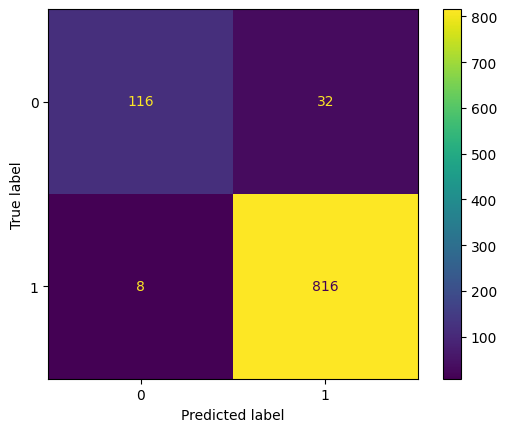

In [33]:
cm = confusion_matrix(y_test, light_gbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

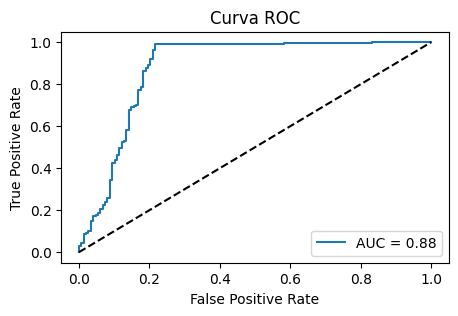

In [34]:
y_prob = lgbm.predict(X_test, raw_score=True)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

In [40]:
joblib.dump(X_StdScaler, 'lightgbm_predictors.pkl')
joblib.dump(y, 'lightgbm_target.pkl')
# para o deploy
np.savetxt('predictors.csv', X_StdScaler, delimiter=',')
np.savetxt('target.csv', y, delimiter=',')